[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/prokaj/elte-python-2023/blob/main/2023-11-06.ipynb)   

Néhány import amit később használni fogunk:

In [1]:
import importlib
import math

if importlib.util.find_spec('ipytest') is None:
    ! pip install --quiet ipytest

import ipytest

ipytest.autoconfig()

# Házi feladat

### 1. feladat

Adott egy dictionary, amiben hallgatók adatai szerepelnek. Minden neptun kódhoz két adat van feljegyezve, a név (`name`) és az előző félév tanulmányi átlaga (`avg`).

Írjunk egy függvényt `list_students` névvel, aminek első paramétere a hallgatók adatait tartalmazó dictionary `students` névvel, a második pedig egy lebegő pontos szám a [1,5] intervallumból `min_avg` névvel, végül a visszatérési értéke azon hallgatók listája `name (neptun kód)` formátumban, akiknek az átlaga a megadott értéket elérte.

A függvényünket lássuk el típus annotációval és adjuk hozzá a következő dokumentációs sztringet:

```text
list of students having at least min_avg result
```

A hallgatók neveit rendezzük lexikografikus sorrendbe.
Pl.

```python
students = {
    "ACF234": {"name": "Kiss Lajos", "avg": 3.5},
    "NBF4DF": {"name": "Nagy Blanka" , "avg": 4.5},
    "KUDFGE": {"name": "Kiss Lajos", "avg": 4.75},
    "BNDF23": {"name": "Boros Attila", "avg": 2.75},
    "ADGTLE": {"name": "Poros Elek", "avg": 2.0},
}
list_students(students, 4)
# -> ["Kiss Lajos (KUDFGE)", "Nagy Blanka (NBF4DF)"]
```

A fenti függvény mellett írjunk teszt függvényt is, ami legalább az alábbi esetekre ellenőrzi a helyes működést.

- A hallgatók adatait tartalmazó dictionary üres.

- Legalább öt hallgatót tartalmazó adatsorból senki sincs aki eléri a megadott küszöböt.

- Legalább öt hallgatót tartalmazó adatsorból mindenki eléri a megadott küszöböt.

- Legalább öt hallgatót tartalmazó adatsorból körülbelül a hallgatók fele éri el a megadott küszöböt.

- Van olyan hallgató, akinek tanulmányi átlaga pont a megadott küszöb.

In [2]:
def list_students(students: dict, min_avg: float) -> list:
    """list of students having at least min_avg result"""
    pass

In [3]:
%%ipytest

def test_empty():
    assert list_students({}, 2.0) == []

def test_min_avg_high():
    students = {
        "ACF234": {"name": "Kiss Lajos", "avg": 3.5},
        "NBF4DF": {"name": "Nagy Blanka" , "avg": 4.5},
        "KUDFGE": {"name": "Kiss Lajos", "avg": 4.75},
        "BNDF23": {"name": "Boros Attila", "avg": 2.75},
        "ADGTLE": {"name": "Poros Elek", "avg": 2.0},
    }
    assert list_students(students, 4.8) == []

def test_min_avg_low():
    students = {
        "ACF234": {"name": "Kiss Lajos", "avg": 3.5},
        "NBF4DF": {"name": "Nagy Blanka" , "avg": 4.5},
        "KUDFGE": {"name": "Kiss Lajos", "avg": 4.75},
        "BNDF23": {"name": "Boros Attila", "avg": 2.75},
        "ADGTLE": {"name": "Poros Elek", "avg": 2.0},
    }
    list_of_students = sorted((student['name'], neptun_id) for neptun_id, student in students.items())

    assert list_students(students, 1.8) == [f"{name} ({neptun})" for name, neptun in list_of_students]


def test_half():
    students = {
        "ACF234": {"name": "Kiss Lajos", "avg": 3.5},
        "NBF4DF": {"name": "Nagy Blanka" , "avg": 4.5},
        "KUDFGE": {"name": "Kiss Lajos", "avg": 4.75},
        "BNDF23": {"name": "Boros Attila", "avg": 2.75},
        "ADGTLE": {"name": "Poros Elek", "avg": 2.0},
    }
    assert list_students(students, 3.2) == [
        "Kiss Lajos (KUDFGE)", 
        "Nagy Blanka (NBF4DF)",
        "Poros Elek (ADGTLE)"
        ]

def test_equal():
    students = {
        "ACF234": {"name": "Kiss Lajos", "avg": 3.5},
        "NBF4DF": {"name": "Nagy Blanka" , "avg": 4.5},
        "KUDFGE": {"name": "Kiss Lajos", "avg": 4.75},
        "BNDF23": {"name": "Boros Attila", "avg": 2.75},
        "ADGTLE": {"name": "Poros Elek", "avg": 2.0},
    }
    assert list_students(students, 3.5) == [
        "Kiss Lajos (KUDFGE)", 
        "Nagy Blanka (NBF4DF)",
        "Poros Elek (ADGTLE)"
        ]



FFFFF                                                                                        [100%]
============================================= FAILURES =============================================
____________________________________________ test_empty ____________________________________________

    def test_empty():
>       assert list_students({}, 2.0) == []
E       assert None == []
E        +  where None = list_students({}, 2.0)

/tmp/ipykernel_243595/1445788677.py:2: AssertionError
________________________________________ test_min_avg_high _________________________________________

    def test_min_avg_high():
        students = {
            "ACF234": {"name": "Kiss Lajos", "avg": 3.5},
            "NBF4DF": {"name": "Nagy Blanka" , "avg": 4.5},
            "KUDFGE": {"name": "Kiss Lajos", "avg": 4.75},
            "BNDF23": {"name": "Boros Attila", "avg": 2.75},
            "ADGTLE": {"name": "Poros Elek", "avg": 2.0},
        }
>       assert list_students(students, 4.8) 

### 2. feladat

Gráfok csúcsait gyakran rövid sztringekkel címkézik. Írjunk egy függvényt, aminek egyetlen paramétere az élek listája, visszatérési értéke pedig egy dictionary, ami minden csúcshoz egy listát tárol a szomszédos csúcsok címkéivel.

Többszörös él esetén is minden csúcs legfeljebb egyszer szerepeljen a listában. A szomszédokat lexikografikusan rendezve soroljuk fel!

Pl. ha

```python
edges = [("A", "B"), ("C", "A"), ("A", "D"), ("C","D"), ("D", "C"), ("E", "E")]
```

és a függvényünk neve `neighbors`, akkor a `neighbors(edges)` hívás eredménye:

```
{
    "A" : ["B", "C", "D"],
    "B" : ["A"],
    "C" : ["A", "D"],
    "D" : ["A", "C"],
    "E" : ["E"],
}
```

Lássuk el a függvényt típus annotációval és adjuk hozzá a következő dokumentációs sztringet:

```text
sparse adjacency matrix of a graph given by edges
```

A fenti függvény mellett írjunk teszt függvényt is, ami legalább az alábbi esetekre ellenőrzi a helyes működést.

- Az élek listája üres.

- Legalább öt él esetén minden él hurok él.

- Legalább négy pont esetén bármely két pont között megy él.

- Legalább öt él esetén nem összefüggő a gráf.

- Legalább öt él esetén van többszörös él.

In [4]:
def neighbors(edges: list) -> dict:
    """sparse adjacency matrix of a graph given by edges"""
    pass

In [5]:
%%ipytest

import itertools

def test_empty():
    assert neighbors([]) == {}

def test_loops():
    edges = [("A", "A"), ("B", "B"), ("C", "C"), ("D", "D"), ("E", "E")]
    assert neighbors(edges) == {
        "A": ["A"], 
        "B": ["B"], 
        "C": ["C"],
        "D": ["D"], 
        "E": ["E"]
    }
    
def test_complete():
    nodes = "ABCDE"
    edges = [(a, b) for a, b in itertools.combinations(nodes, repeat=2)]
    result = {a: [b for b in nodes if b != a] for a in nodes}
    assert neighbors(edges) == result

def test_not_connected():
    nodes = "ABC"
    edges = [(a, b) for a, b in itertools.combinations(nodes, repeat=2)]
    result = {a: [b for b in nodes if b != a] for a in nodes}

    nodes = "DEF"
    edges.extend((a, b) for a, b in itertools.combinations(nodes, repeat=2))
    result.update({a: [b for b in nodes if b != a] for a in nodes})
    
    assert neighbors(edges) == result

def test_multiple_edge():
    edges = [("A", "B"), ("C", "A"), ("A", "D"), ("C","D"), ("D", "C"), ("E", "E")]
    assert neighbors(edges) == {
        "A" : ["B", "C", "D"],
        "B" : ["A"],
        "C" : ["A", "D"],
        "D" : ["A", "C"],
        "E" : ["E"],
    }

FFFFF                                                                                        [100%]
============================================= FAILURES =============================================
____________________________________________ test_empty ____________________________________________

    def test_empty():
>       assert neighbors([]) == {}
E       assert None == {}
E        +  where None = neighbors([])

/tmp/ipykernel_243595/560695211.py:4: AssertionError
____________________________________________ test_loops ____________________________________________

    def test_loops():
        edges = [("A", "A"), ("B", "B"), ("C", "C"), ("D", "D"), ("E", "E")]
>       assert neighbors(edges) == {
            "A": ["A"],
            "B": ["B"],
            "C": ["C"],
            "D": ["D"],
            "E": ["E"]
        }
E       AssertionError: assert None == {'A': ['A'], 'B': ['B'], 'C': ['C'], 'D': ['D'], ...}
E        +  where None = neighbors([('A', 'A'), ('B', 'B'), (

### 3. feladat

Éleivel adott egy élsúlyozott gráf. Írjunk egy függvényt, ami minden csúcsra kiszámolja a hozzá csatlakozó élek összsúlyát. A függvény egyetlen argumentuma egy lista, aminek elemei számhármasok `(a, b, w)` alakban. `a` és `b` az él két végpontja, `w` az `(a,b)` él súlya. Többszörös élek előfordulhatnak.

A függvény visszatérési értéke egy dictionary, csúcsok a hozzájuk tartozó összsúllyal.
pl. ha

```python
edges =  [(100, 200, 1), (100, 200, 2), (100, 1, -1), (1, 1, 5)]
```

és a függvényt `node_weight`-nek hívjuk, akkor

```python
node_weight(edges)
```

eredménye a következő dictionary

```
{100: 2, 200: 3, 1: 4}
```

Vegyük észre a hurok él hatását.

Lássuk el a függvényt típus annotációval és adjuk hozzá a következő dokumentációs sztringet:

```text
node weights from edge weights
```

A fenti függvény mellett írjunk teszt függvényt is, ami legalább az alábbi esetekre ellenőrzi a helyes működést.

- Az élek listája üres.

- Legalább öt él esetén van hurok él.

- Legalább öt él esetén minden élsúly 1.

- Legalább öt él esetén az élsúlyok ,,véletlenszerűek”.

- Legalább öt él esetén van többszörös él.

In [6]:
def node_weight(edges: list) -> dict:
    """node weights from edge weights"""
    pass

In [7]:
%%ipytest

def test_empty():
    assert node_weight([]) == {}

def test_loop():
    edges =  [(100, 200, 1), (100, 200, 2), (100, 1, -1), (1, 1, 5), (100, 3, 1)]
    assert node_weight(edges) == {
        100: 4, 
        200: 3, 
        1: 4,
        3: 1
    }


def test_unit_weight():
    edges =  [(100, 200, 1), (100, 200, 1), (100, 1, 1), (1, 1, 1), (100, 3, 1)]
    assert node_weight(edges) == {
        100: 3, 
        200: 2, 
        1: 2,
        3: 1
    }
    

    

FFF                                                                                          [100%]
============================================= FAILURES =============================================
____________________________________________ test_empty ____________________________________________

    def test_empty():
>       assert node_weight([]) == {}
E       assert None == {}
E        +  where None = node_weight([])

/tmp/ipykernel_243595/2912988265.py:2: AssertionError
____________________________________________ test_loop _____________________________________________

    def test_loop():
        edges =  [(100, 200, 1), (100, 200, 2), (100, 1, -1), (1, 1, 5), (100, 3, 1)]
>       assert node_weight(edges) == {
            100: 4,
            200: 3,
            1: 4,
            3: 1
        }
E       assert None == {1: 4, 3: 1, 100: 4, 200: 3}
E        +  where None = node_weight([(100, 200, 1), (100, 200, 2), (100, 1, -1), (1, 1, 5), (100, 3, 1)])

/tmp/ipykernel_243595/2

## 2-sum

Adott egy $n\leq 10^5$ szám és egy $n$ hosszú $a$ lista, melynek elemeire $-10^{5} \leq a_i \leq 10^5$ teljesül.

Keressünk olyan $1\leq p<q\leq n$ indexpárt, hogy $a[p] = −a[q]$, ha ilyen létezik.


Például:
```
5
5 4 -5 6 8
```

itt egy lehetséges válasz `(0, 2)`

**Ötlet**: iteráljunk végig az indexpárokon és vizsgáljuk meg minden esetben, hogy teljesíti-e a feltételeket.

Ezt a megoldási módszert, amiben potenciálisan minden lehetséges jelöltet kipróbálunk, **brute force**-alapú (nyers erő) megoldásnak nevezünk. A brute force megoldás mindig működik, a kérdés inkább az, hogy vajon nem tudunk-e ennél jobbat kitalálni.

In [8]:
from itertools import combinations

def solve_2sum(seq):
    for (i1, x1), (i2, x2) in combinations(enumerate(seq), 2):
        if x1 == -x2:
            return i1, i2
    return None


In [9]:
def format_ns(t):
    for unit in ['ns', 'μs', 'ms']:
        if t<1000:
            return f"{t:.2f} {unit}"
        t /= 1000
    return f"{t:.2f} s"
    

In [10]:
import random
import time

random.seed(2112)

xss = [
       [random.randint(-10**5, 10**5) for _ in range(50_000)],
       list(range(1,51)),
       list(range(1,501)),
       list(range(1,5_001))
]

for xs in xss:
    t = time.perf_counter_ns()
    res = solve_2sum(xs)
    print(f"run time: {format_ns(time.perf_counter_ns() - t)} for input size: {len(xs)}")
    print(f"solution: {res}, check xs[res]={tuple(xs[i] for i in res) if res else res}")



run time: 12.14 ms for input size: 50000
solution: (1, 6739), check xs[res]=(30064, -30064)
run time: 60.10 μs for input size: 50
solution: None, check xs[res]=None
run time: 4.98 ms for input size: 500
solution: None, check xs[res]=None
run time: 523.44 ms for input size: 5000
solution: None, check xs[res]=None


A futási idő négyzetes a sorozat hosszában. Ha a bemenet 50_000 hosszúságú, akkor várhatóan
$$
    550*100~\text{ms} = 55~000~\text{ms} = 55~\text{s}
$$
a futási idő

**Ötlet.** Rendezzük sorba az elemeket. Ekkor intervallum felezéssel tetszőleges számról el tudjuk dönteni szerepel-e a számok között.

In [11]:
def find(sorted_lst, x, hi=None, key=lambda x: x):
    i0, i1 = 0, (len(sorted_lst) if hi is None else hi)
    while i0 < i1:
        i = (i0+i1)//2
        if key(sorted_lst[i]) < x:
            i0 = i+1
        else:
            i1 = i
            
    return i0
    

def solve_2sum_with_sort(seq):
    seq = sorted((x, i) for i, x in enumerate(seq))
    for k, (x1, q1) in enumerate(seq):
        i = find(seq, -x1, hi=k, key=lambda x: x[0])
        if i < k:
            x2, q2 = seq[i]
            if x1+x2 == 0:
                return (q1, q2) if q1<q2 else (q2, q1)
    return None


In [12]:
import random
import time

random.seed(2112)

xss = [
       [random.randint(-10**5, 10**5) for _ in range(50_000)],
       list(range(1,51)),
       list(range(1,501)),
       list(range(1,5_001))
]

for xs in xss:
    print("="*50)
    for fun in [solve_2sum, solve_2sum_with_sort]:
        t = time.perf_counter_ns()
        res = fun(xs)
        print("-"*50)
        print(f"run time: {format_ns(time.perf_counter_ns() - t)} for input size: {len(xs)}")
        print(f"solution: {res}, check xs[res]={tuple(xs[i] for i in res) if res else res}")



--------------------------------------------------
run time: 11.73 ms for input size: 50000
solution: (1, 6739), check xs[res]=(30064, -30064)
--------------------------------------------------
run time: 86.81 ms for input size: 50000
solution: (42467, 49515), check xs[res]=(-23, 23)
--------------------------------------------------
run time: 67.78 μs for input size: 50
solution: None, check xs[res]=None
--------------------------------------------------
run time: 54.93 μs for input size: 50
solution: None, check xs[res]=None
--------------------------------------------------
run time: 5.29 ms for input size: 500
solution: None, check xs[res]=None
--------------------------------------------------
run time: 627.25 μs for input size: 500
solution: None, check xs[res]=None
--------------------------------------------------
run time: 600.54 ms for input size: 5000
solution: None, check xs[res]=None
--------------------------------------------------
run time: 9.01 ms for input size: 5000



Milyen típus lenne alkalmas a már látott értékek és legalább egy hozzájuk tartozó index tárolására?

Egészítsük ki a következő függvényt!

In [13]:
def solve_2_sum_better(seq):

    for i, x in enumerate(seq):
        ## ha -x volt korábban return
        pass
    return None

In [14]:
random.seed(2112)

xss = [
       [random.randint(-10**5, 10**5) for _ in range(50_000)],
       list(range(1,51)),list(range(1,501)),
       list(range(1,5_001)),
       list(range(1,50_001)),
       [1]*50, [1]*500, [1]*5_000, [1]*50_000
       ]


for xs in xss:
    print(f"---xs min={min(xs)}, max={max(xs)}, len(xs)={len(xs)}")

    t = time.perf_counter_ns()
    res = solve_2_sum_better(xs)
    print(f"   run time: {format_ns(time.perf_counter_ns() - t)}")
    print(f"   solution: {res}, check xs[res]={tuple(xs[i] for i in res) if res else res}")
    print("---")

---xs min=-99999, max=99997, len(xs)=50000
   run time: 1.31 ms
   solution: None, check xs[res]=None
---
---xs min=1, max=50, len(xs)=50
   run time: 3.29 μs
   solution: None, check xs[res]=None
---
---xs min=1, max=500, len(xs)=500
   run time: 10.55 μs
   solution: None, check xs[res]=None
---
---xs min=1, max=5000, len(xs)=5000
   run time: 99.23 μs
   solution: None, check xs[res]=None
---
---xs min=1, max=50000, len(xs)=50000
   run time: 1.04 ms
   solution: None, check xs[res]=None
---
---xs min=1, max=1, len(xs)=50
   run time: 2.80 μs
   solution: None, check xs[res]=None
---
---xs min=1, max=1, len(xs)=500
   run time: 10.41 μs
   solution: None, check xs[res]=None
---
---xs min=1, max=1, len(xs)=5000
   run time: 98.39 μs
   solution: None, check xs[res]=None
---
---xs min=1, max=1, len(xs)=50000
   run time: 1.27 ms
   solution: None, check xs[res]=None
---


## Új témák



### További eszközök a `collections`, `itertools` modulból.

In [ ]:
import collections

print(collections.__doc__)

This module implements specialized container datatypes providing
alternatives to Python's general purpose built-in containers, dict,
list, set, and tuple.

* namedtuple   factory function for creating tuple subclasses with named fields
* deque        list-like container with fast appends and pops on either end
* ChainMap     dict-like class for creating a single view of multiple mappings
* Counter      dict subclass for counting hashable objects
* OrderedDict  dict subclass that remembers the order entries were added
* defaultdict  dict subclass that calls a factory function to supply missing values
* UserDict     wrapper around dictionary objects for easier dict subclassing
* UserList     wrapper around list objects for easier list subclassing
* UserString   wrapper around string objects for easier string subclassing




In [ ]:
print(itertools.__doc__)

Functional tools for creating and using iterators.

Infinite iterators:
count(start=0, step=1) --> start, start+step, start+2*step, ...
cycle(p) --> p0, p1, ... plast, p0, p1, ...
repeat(elem [,n]) --> elem, elem, elem, ... endlessly or up to n times

Iterators terminating on the shortest input sequence:
accumulate(p[, func]) --> p0, p0+p1, p0+p1+p2
chain(p, q, ...) --> p0, p1, ... plast, q0, q1, ...
chain.from_iterable([p, q, ...]) --> p0, p1, ... plast, q0, q1, ...
compress(data, selectors) --> (d[0] if s[0]), (d[1] if s[1]), ...
dropwhile(pred, seq) --> seq[n], seq[n+1], starting when pred fails
groupby(iterable[, keyfunc]) --> sub-iterators grouped by value of keyfunc(v)
filterfalse(pred, seq) --> elements of seq where pred(elem) is False
islice(seq, [start,] stop [, step]) --> elements from
       seq[start:stop:step]
starmap(fun, seq) --> fun(*seq[0]), fun(*seq[1]), ...
tee(it, n=2) --> (it1, it2 , ... itn) splits one iterator into n
takewhile(pred, seq) --> seq[0], seq[1], until

### Kivételkezelés


```python
try:
    pass
except:
    pass
finally:
    pass
```
        
Nem nagyon fogunk olyan kódot írni, ami ezt használja. Kivéve két esetet:

- üres sorozat kezelése `next` hívásnál: `StopIteration`

- Saját kontexus `with` statementhez, hasonló ahhoz, amit file olvasásnál láttunk előadáson.


[Beépített kivételek listája](https://docs.python.org/3/library/exceptions.html#exception-hierarchy)

In [76]:
def pairs(seq):
    it = iter(seq)
    a = next(it)
    for b in it:
        yield a, b
        a = b

In [81]:
%%ipytest

def test_pairs_empty():
    assert list(pairs([])) == []

def test_pairs_short():
    assert list(pairs([1])) == []
    assert list(pairs([1, 2])) == [(1,2)]    
    assert list(pairs([1, 2, 3])) == [(1,2), (2, 3)]

..                                                                                           [100%]
2 passed in 0.01s


Javítás. Ellenőrizni kell, hogy nem üres-e a sorozat.

In [80]:
def pairs(seq):
    it = iter(seq)
    try:
        a = next(it)
    except StopIteration:
        return
    for b in it:
        yield a, b
        a = b

Ha hibát szeretnénk jelezni, akkor a `raise` statement-et használhatjuk.
pl.

In [89]:
def only_positive_int(x):
    if not isinstance(x, int):
        raise TypeError
    if x <= 0:
        raise ValueError
    return x

# only_positive_int(2.0) -> TypeError
# only_positive_int(-1) -> ValueError

Hogyan tudjuk tesztelni a helyes működést?

In [91]:
%%ipytest
from pytest import raises

def test_only_positive_int():
    
    assert only_positive_int(2) == 2
    
    with raises(TypeError):
        only_positive_int(2.0)

    with raises(TypeError):
        only_positive_int("2.0")

    with raises(ValueError):
        only_positive_int(-1)

    

.                                                                                            [100%]
1 passed in 0.01s


# Feladatok előadásról

### Helyes zárójelezés


Adott egy kifejezés, ami a `(`, `)`, `[` és `]` karakterekből állhat. 

Állapítsuk meg, hogy a kifejezés helyesen zárójelezett-e vagy sem.

pl. `([()])` helyes zárójelezés, `([(]))` nem az, mert a szögletes zárójelpár tartalmaz pár nélküli nyitó zárójelet.


In [93]:
pairs = "()[]{}"
opening = dict(zip(pairs[::2], pairs[1::2]))


In [96]:
def as_mapping(d):
    return ", ".join(" -> ".join(x) for x in d.items())

print(f"opening = {''.join(opening)},\nopening = {as_mapping(opening)}")

opening = ([{,
opening = ( -> ), [ -> ], { -> }


Egészítsük ki a következő kódot!

In [17]:
def is_balanced(string):
    pass


In [18]:
%%ipytest

def test_is_balanced():
    assert is_balanced("[([(()[]())])]") == True
    assert is_balanced("[[))") == False
    assert is_balanced("") == True
    assert is_balanced("[") == False
    assert is_balanced(")") == False

F                                                                                            [100%]
============================================= FAILURES =============================================
_________________________________________ test_is_balanced _________________________________________

    def test_is_balanced():
>       assert is_balanced("[([(()[]())])]") == True
E       AssertionError: assert None == True
E        +  where None = is_balanced('[([(()[]())])]')

/tmp/ipykernel_243595/1312931741.py:2: AssertionError
===================================== short test summary info ======================================
FAILED t_218f38344b43489aa6f6b7b3c87e207c.py::test_is_balanced - AssertionError: assert None == True
1 failed in 0.01s


### Halmaz típus


Készítsünk saját halmaz-implementációt! A halmaz elemeit tároljuk egy belső listában, figyelve arra, hogy a lista később sem tartalmazhat duplikátumokat!

- lehessen üres halmazt készíteni
- legyen `add`` metódusa, amivel hozzá lehet adni új elemet
- lehessen értelmes módon kiprintelni a halmazt


In [19]:
class SET:
    def __init__(self):
        pass

    def add(self, element):
        pass

    def update(self, elements):
        pass

    def __str__(self):
        pass

    def __repr__(self):
        pass

### Fibonacci számok intervallumból



Írjuk egy függvényt, mely adott $I=[a, b]\ (a \leq b)$ intervallum esetén visszaadja azon Fibonacci számokat, melyek az $I$ intervallumba esnek.


In [20]:
def calc_fibonacci_numbers_in_interval(a, b):
    pass

### Ismétlődések törlése


Egy adott sztringből távolítsuk el az egymás mellett álló ismétlődő karatereket. 

Példa: 
```
"kukkkuuuurrrriiiikuuuuuuuu" -> "kukuriku". 
```

(Ez már volt korábban. Most keressünk elegánsabb megoldást, pl. az `itertools` könyvtár függvényeinek segítségével.)


In [21]:

def remove_consecutive_duplicates(string):
    pass


### Számolás polinomokkal

Írjunk egy `Polynomial` osztályt, ahol a polinomot tároljuk el, mint az együtthatóinak listáját.

Implementáljuk két ilyen polinom összeadását (azaz írjuk meg az `__add__`, valamint a `__repr__`  metódust, hogy lássuk, mi egy ilyen osztálypéldány tartalma).

Egy polinom függvény is. Implementáljuk a `__call__` metódust is, ami kiértékeli a polinomot egy adott pontban!


In [22]:
def format_term(k, coeff, fmt="x^{k}"):
    c = f"{coeff}" if coeff!=1 else ""
    match k:
        case 0:
            x = ""
            c = f"{coeff}"
        case 1:
            x = "x"
        case _:
            x = fmt.format(k=k)
    sep = "" if coeff <= 0 else "+"
    return f"{c}{x}", sep

class Polynomial:
    def __init__(self, *coefficients):
        self.coeff = list(reversed(coefficients))
    
    def __add__(self, other):
        
        coeff_a = self.coeff
        coeff_b = other.coeff

        if len(coeff_a) < len(coeff_b):
            coeff_a, coeff_b = coeff_b, coeff_a
        
        coeff = coeff_a.copy()
        
        for i, c in enumerate(coeff_b):
            coeff[i] += c 
        
        p = Polynomial()
        p.coeff = coeff
        return p

    def __mul__(self, other):
        
        coeff = [0]*(len(self.coeff)+len(other.coeff)-1)
        for i, ca in enumerate(self.coeff):
            for j, cb in enumerate(other.coeff):
                coeff[i+j] += ca*cb
        
        p = Polynomial()
        p.coeff = coeff
        return p

    def __rmul__(self, c):
        p = Polynomial()
        p.coeff = [c0*c for c0 in self.coeff]
        return p

    def __call__(self, x):
        value = 0
        for c in reversed(self.coeff):
            value *= x
            value += c
        return value

    def as_token_list(self, formatter, fmt):
        coeffs = [(k, coeff) for k, coeff in enumerate(self.coeff) if coeff != 0]
        if len(coeffs) == 0:
            coeffs = [(0, 0)]
        tokens = []
        for k, coeff in coeffs:
            tokens.extend(format_term(k, coeff, fmt))
        tokens.pop()
        tokens.reverse()
        return tokens
        
    def __str__(self):
        return ''.join(self.as_token_list(format_term, "x^{k}"))

    def __repr__(self):
        return f"{type(self).__name__}({', '.join(map(str, reversed(self.coeff)))})"
        
    def _repr_latex_(self):
        formula = ''.join(self.as_token_list(format_term, "x^{{{k}}}")) 
        return f"${formula}$"



In [23]:


p = Polynomial(1, 0, -3)    # -> x^2 - 3
q = Polynomial(2, 0, 3, 1)  # -> 2x^3 + 3x + 1
display(p)
display(q)
display(p*q)
display(2*p)


Polynomial(1, 0, -3)

Polynomial(2, 0, 3, 1)

Polynomial(2, 0, -3, 1, -9, -3)

Polynomial(2, 0, -6)

In [24]:
q(1)


6

#### Korábbi feladat

Írjunk egy függvényt, ami kiszámolja az első $n$ természetes szám $p$-ik hatványösszegét.

pl. `p = 0`-ra

```Python
def f0(n):
    return n
```

jó, mert $k^0=1$ ha $k=1,\dots,n$ és ezek összege pont $n$.

Ha `p = 1`, akkor

```Python
def f1(n):
    return n*(n+1)//2
```

jó, mert $\sum_{k=1}^n k = n(n+1)/2$.

Még `p = 2`-t is tanultuk

```Python
def f2(n):
    return n*(n+1)*(2*n+1)//6
```

Általános $p$-re tudunk-e ilyen függvényt írni?

In [25]:
def mk_power_sum(p):
    def f(n):
        total = 0
        for k in range(1, n+1):
            total += k**p
        return total

    f.__doc__ = f"""
        {p}-ik hatványok összegét számolja
        """

    return f

In [26]:
f2_slow = mk_power_sum(2)

In [27]:
f2_slow?

Signature: f2_slow(n)
Docstring: 2-ik hatványok összegét számolja
File:      /tmp/ipykernel_243595/3344454091.py
Type:      function

In [28]:
[f2_slow(i) for i in range(0, 10)]

[0, 1, 5, 14, 30, 55, 91, 140, 204, 285]

In [29]:
def f2_fast(n):
    return n*(n+1)*(2*n+1)//6

In [30]:
%timeit f2_slow(10_000)
%timeit f2_fast(10_000)

2.11 ms ± 59.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
771 ns ± 14.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Ötlet

$$
    \sum_{k=r}^n  \binom{k}{r} = \binom{n+1}{r+1}
$$

**Bizonyítás.**
$\{1,2,\dots,n+1\}$-ből válasszunk ki $r+1$ különböző számot.

Összes lehetőség:
$$
\binom{n+1}{r+1}.
$$

Számoljuk meg az eseteket aszerint szétbontva is, hogy legnagyobb kiválasztott szám mivel egyenlő.

Ha a legnagyobb szám $k+1$, akkor a maradék $r$ számot $\{1,2,\dots, k\}$ közül választjuk. Így az esetek száma
$$
    \sum_{k+1=r+1}^{n+1} \binom{k}{r} =  \sum_{k=r}^{n} \binom{k}{r}
$$  
$k+1$ helyett $k$ az összegzési változó

Ugyanez másképp.

$$
\binom{k}{r} = \frac{1}{r!} k(k-1)\cdots(k-r+1) = \frac{1}{r!}p_r(k-r+1),\quad\text{ahol}\quad p_r(x) = x(x+1)\cdots(x+r-1)
$$
és
$$
    \sum_{j=1}^{n-r+1} \frac{1}{r!}p_r(j) = \frac{1}{(r+1)!}p_{r+1}(n+1-(r+1)+1)= \frac{1}{(r+1)!} p_{r+1}(n-r+1)\quad\text{minden $n\geq r$ és $r\geq 0$-ra}
$$

Az összegzés felső határa és $p_{r+1}$ argumentuma ugyanaz, azaz

$$
\sum_{j=0}^{n} p_r(j) = \frac{1}{r+1}p_{r+1}(n)
$$

**Lineáris algebra.**

$$
p_0\equiv 1,\quad p_1(x)=x,\quad p_2(x)=x(x+1),\quad\dots,\quad p_r(x)=x(x+1)\cdots(x+r-1)
$$

bázis a legfeljebb $r$-edfokú polinomok vektorterében.

$$
    x^r = \sum_{i=0}^r a_i p_i(x)
$$
és
$$
    \sum_{k=0}^n k^r = \sum_{k=0}^n \sum_{i=0}^r a_i p_i(k) =  \sum_{i=0}^r a_i  \sum_{k=0}^n p_i(k) = \sum_{i=0}^r \frac{a_i}{r+1}  p_{i+1}(n)
$$


### Összefoglalva

- Egy polinomot az együtthatókkal ábrázolhatunk.
- Kellene egy függvény, ami a természetes $1, x, x^2,\dots$ bázisban felírt polinomot a $p_0,p_1,\dots$ bázisban ír fel.
- $p_0, p_1, \dots,$ bázisban az összegzés könnyű, lényegében arrébb kell tolni az együtthatókat.
- A $p_0,p_1,\dots$ bázisban felírt polinomot vagy visszaszámoljuk a természetes bázisba, vagy megírjuk a függvényt, ami kiértékeli a függvényt egy adott pontban.

Vegyük észre, hogy $p_0$ azonosan 1, $p_1(0)=0$, $p_2(0)=p_2(-1)=0$, stb.

Ha $f=\sum_i a_i p_i$, akkor
$$
    f(0) = \sum_i a_i p(0) = a_0, \quad f(-1) = a_0 p_0(-1) + a_1 p_1(-1),\quad f(-k) = a_0 p_0(-k) + a_1 p_1(-k) + \cdots + a_k p_k(-k).
$$
amiből

$$
\begin{align*}
    a_0 & = f(0)\\
    a_1 & = \frac{f(-1) - a_0 p_0(-1)}{p_1(-1)}\\
    \vdots\\
    a_k & = \frac{f(-k) - \sum_{j=0}^{k-1} a_j p_j(-k)}{p_{k}(-k)}\\
    \vdots
\end{align*}
$$  
Kihasználhatjuk még, hogy
$$
p_k(-k)=(-k)(-k+1)\cdots(-k+(k-1))=(-1)^k k!.
$$

In [31]:
def basis():
    i = 0
    p = Polynomial(1)
    while True:
        yield p
        p *= Polynomial(1,i)
        i += 1


In [32]:
from itertools import islice

In [33]:
for i, p in enumerate(islice(basis(), 5), 1):
    display(p)
    print(f"{i=}, {p(-i)=}")
    print("-"*20)

Polynomial(1)

i=1, p(-i)=1
--------------------


Polynomial(1, 0)

i=2, p(-i)=-2
--------------------


Polynomial(1, 1, 0)

i=3, p(-i)=6
--------------------


Polynomial(1, 3, 2, 0)

i=4, p(-i)=-24
--------------------


Polynomial(1, 6, 11, 6, 0)

i=5, p(-i)=120
--------------------


In [34]:
def mk_fast_power_sum(p: Polynomial) -> Polynomial:
    n = len(p.coeff)
    it = iter(basis())
    
    coeff = p(0)
    q0 = coeff*next(it)
    q = Polynomial()

    for i, pi in enumerate(islice(it, n), 1):
        q += (coeff/i)*pi
        coeff = ((p(-i) - q0(-i))/pi(-i))
        q0 += coeff*pi

    return q


In [35]:
mk_fast_power_sum(Polynomial(1, 0))

Polynomial(0.5, 0.5, 0.0)

In [36]:
from fractions import Fraction

In [37]:
mk_fast_power_sum(Polynomial(Fraction(1, 1), 0, 0, 0, 0))

Polynomial(1/5, 1/2, 1/3, 0, -1/30, 0)

#### Gyors ellenőrzés.

In [38]:
%%ipytest

def test_fast_power_sum():
    p0 =  Polynomial(Fraction(1, 1),0)
    p1 = p0
    for i in range(1, 4):
        f = mk_fast_power_sum(p1)
        p1 *= p0
        g = mk_power_sum(i)
        for n in range(1000):
            assert f(n) == g(n)

.                                                                                            [100%]
1 passed in 0.35s


In [39]:
f2 = mk_fast_power_sum(Polynomial(Fraction(1,1), 0, 0))
%timeit f2_slow(10_000)
%timeit f2(10_000)
%timeit f2_fast(10_000)

2.06 ms ± 7.69 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.38 µs ± 97.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
736 ns ± 10.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [40]:
f2.__dict__


{'coeff': [Fraction(0, 1), Fraction(1, 6), Fraction(1, 2), Fraction(1, 3)]}



#### Feladat.

Írjuk meg a `grep` program egyszerűsített változatát.

A `grep` soronként olvas egy szövegfileból és a megadott mintát tartalmazó sorokat kiírja a kimenetre.

Képes arra, hogy kiírja a mintát tartalmazó sorral együtt azt megelőző és azt követő néhány sort is.

A mi változatunk egy generator függvény lesz, ami a megadott file soraiból azokat tartja meg, amik az adott mintát tartalmazzák.


### Olvasás fileból

    with open(filename, mode) as file:
       do_something with file
       
- `filename` a file elérési útja
- `mode` 
  + `r` reading olvasás
  + `w` writing írás
  + `b` binary
  + `t` text
  + `a` append
  
  Ha nem adjuk meg `rt`.
  
  Lehetne még `r, w, rb, wb, a`
  

In [ ]:
%%writefile test.txt
első sor
második sor
harmadik
utolsó

Overwriting test.txt


In [ ]:
filename = "test.txt"

with open(filename, "r") as file:
    print(file)
    print(f"---{filename}:")
    for line in file:
        print(line, end="")
    print("---")
        

<_io.TextIOWrapper name='test.txt' mode='r' encoding='UTF-8'>
---test.txt:
első sor
második sor
harmadik
utolsó
---


Egészítsük ki a következő kódot!

```
def simple_grep(filename: str, pattern: str): # Generator[str]
    with open(filename, "r") as file:
        for line in ???:
            if ???:
                yield line
```

### Adatok olvasása netről

Ez  megoldható `urllib.request` modullal


In [ ]:
import urllib.request as request

url = "https://www.gutenberg.org/files/1342/1342-0.txt" # Pride and prejudice
url = "https://www.gutenberg.org/ebooks/67098.txt.utf-8" # Winnie the pooh

with request.urlopen(url) as file:
    btext = file.read()

print(type(btext))

<class 'bytes'>


In [ ]:
text = btext.decode()
lines = text.split("\r\n")


In [ ]:
len(lines), lines[:50]

(4003,
 ['\ufeffThe Project Gutenberg eBook of Winnie-the-Pooh, by A. A. Milne',
  '',
  'This eBook is for the use of anyone anywhere in the United States and',
  'most other parts of the world at no cost and with almost no restrictions',
  'whatsoever. You may copy it, give it away or re-use it under the terms',
  'of the Project Gutenberg License included with this eBook or online at',
  'www.gutenberg.org. If you are not located in the United States, you',
  'will have to check the laws of the country where you are located before',
  'using this eBook.',
  '',
  'Title: Winnie-the-Pooh',
  '',
  'Author: A. A. Milne',
  '',
  'Illustrator: Ernest H. Shepard',
  '',
  'Release Date: January 3, 2022 [eBook #67098]',
  '[Most recently updated: October 12, 2022]',
  '',
  'Language: English',
  '',
  'Produced by: Greg Weeks, Mary Meehan, Iona Vaughan, David T. Jones and the',
  '             online Distributed Proofreaders Canada team at',
  '             http://www.pgdpcanada.net',
 

In [ ]:
request.urlretrieve?

Signature: request.urlretrieve(url, filename=None, reporthook=None, data=None)
Docstring:
Retrieve a URL into a temporary location on disk.

Requires a URL argument. If a filename is passed, it is used as
the temporary file location. The reporthook argument should be
a callable that accepts a block number, a read size, and the
total file size of the URL target. The data argument should be
valid URL encoded data.

If a filename is passed and the URL points to a local resource,
the result is a copy from local file to new file.

Returns a tuple containing the path to the newly created
data file as well as the resulting HTTPMessage object.
File:      ~/.config/jupyterlab-desktop/jlab_server/lib/python3.8/urllib/request.py
Type:      function


In [ ]:
request.urlretrieve(url, "winnie-the-pooh.txt")

('winnie-the-pooh.txt', <http.client.HTTPMessage at 0x7f340d775e50>)

In [ ]:
! ls

1-gyakorlat.ipynb  6-gyakorlat.ipynb  Digraph.gv       test.txt
2-gyakorlat.ipynb  7-gyakorlat.ipynb  Digraph.gv.pdf   winnie-the-pooh.txt
3-gyakorlat.ipynb  8-gyakorlat.ipynb  P0022_names.txt
4-gyakorlat.ipynb  9-gyakorlat.ipynb  __pycache__
5-gyakorlat.ipynb  conway.py	      README.md


In [ ]:
! head winnie-the-pooh.txt

The Project Gutenberg eBook of Winnie-the-Pooh, by A. A. Milne

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.



In [ ]:
def simple_grep(filename: str, pattern: str): # Generator[str]
    with open(filename, "r") as file:
        for lineno, line in enumerate(file):
            if pattern in line.lower():
                yield lineno, line

In [ ]:
list(itertools.islice(simple_grep("winnie-the-pooh.txt", "eeyore"), 5))

[(169, '       IV. IN WHICH EEYORE LOSES A TAIL AND POOH FINDS ONE\n'),
 (173, '       VI. IN WHICH EEYORE HAS A BIRTHDAY AND GETS TWO PRESENTS\n'),
 (998, '                      IN WHICH EEYORE LOSES A TAIL\n'),
 (1002,
  'The Old Grey Donkey, Eeyore, stood by himself in a thistly corner of\n'),
 (1007,
  'about. So when Winnie-the-Pooh came stumping along, Eeyore was very glad\n')]

In [ ]:
#open?

## Melyek a leggyakoribb szavak a Micimackó angol változatában? 

In [ ]:
from collections import Counter

In [ ]:
def words(lines):
    for line in lines:
        for word in line.split():
            yield word

In [ ]:
with open("winnie-the-pooh.txt") as textfile:
    counter = Counter(map(str.lower, words(itertools.islice(textfile, 50_000))))
len(counter)

4557

In [ ]:
counter.most_common(20)

[('and', 995),
 ('the', 879),
 ('to', 634),
 ('he', 634),
 ('a', 588),
 ('of', 507),
 ('said', 445),
 ('it', 369),
 ('in', 322),
 ('you', 320),
 ('was', 288),
 ('i', 273),
 ('his', 220),
 ('that', 212),
 ('as', 185),
 ('with', 165),
 ('had', 164),
 ('pooh', 164),
 ('at', 159),
 ('for', 156)]

# Egy gráfelméleti algoritmus

## Feladat

Adott egy `n` csúcsú irányítatlan gráf az élek listájával. A gráf csúcsait `0`-tól `n-1`-ig címkéztük meg, az éleket pedig a végpontokkal.

Emellett adott egy kiindulási pont és egy végpont. Azt szeretnénk eldönteni, hogy el lehet-e jutni a kiindulási pontból a végpontba a gráf éleit használva.

Gondolhatunk arra, hogy a gráf egy úthálózatot ír le és a kérdés az, hogy el tudunk-e jutni `A`-ból `B`-be.

Pl. `n = 3`, élek `edges = [[0,1], [1,2], [2,0]]`, `A =  0`, `B = 2`.

Gráfok megjelenítésére egy hasznos könyvtár a `graphviz`.

In [41]:
import importlib
if importlib.util.find_spec('graphviz') is None:
    ! pip install graphviz
import graphviz

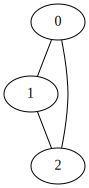

In [42]:
edges = [[0,1], [1,2], [2,0]]
g0 = graphviz.Graph()

g0.edges([(str(a), str(b)) for a, b in edges])
g0

A gráf összefüggő, tetszőleges `A`, `B` esetén a válasz: `True`

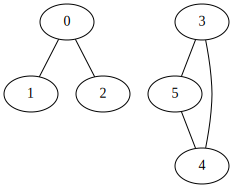

In [43]:
n = 6
edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
A = 0
B = 5

g1 = graphviz.Graph()
g1.edges([(str(a), str(b)) for a, b in edges])
g1

Nincs út 0 és 5 között. A válasz: `False`

Összefüggőségi komponenseket szeretnénk számolni.



## Ötlet.

Az él nélküli gráfból indulunk ki. Itt egy elemű komponensek vannak.

Minden komponensből válasszunk egy reprezentáns és minden $i$ pontra feljegyezzük, melyik komponensben van.




In [44]:
def show_graph(roots, direction = 'LR'):
    g = graphviz.Digraph(graph_attr={'rankdir': direction})
    g.edges((str(i), str(r)) for i, r in enumerate(roots))
    return g

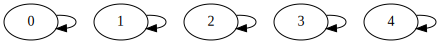

In [45]:
n = 5
roots = [i for i in range(n)]
display(show_graph(roots, 'TD'))

ha behúzzuk a $(0, 1)$ élet, akkor $0$ és $1$ azonos komponensbe kerül. Választhatunk a két összeuniózott komponens reprezentánsa között, legyen pl. 1

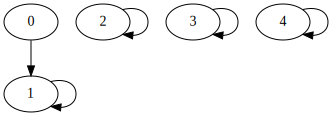

In [46]:
roots[0] = 1
display(show_graph(roots, 'TD'))

Ha most a (0, 2) élet akarjuk behúzni, akkor nem állíthatjuk át `roots[0]`. Meg kell keresnünk `0` komponensének reprezentását, ez 1 és vagy `roots[1]`-et állítjuk 2 -re, vagy `roots[2]`-t 1-re.

In [47]:
def find(roots, a):
    while a != roots[a]:
        a = roots[a]
    return a

In [48]:
find(roots, 0), find(roots, 2)

(1, 2)

In [49]:
def union(roots, a, b):
    ra = find(roots, a)
    rb = find(roots, b)
    roots[ra] = rb

After union(0, 2) roots=[1, 2, 2, 3, 4]


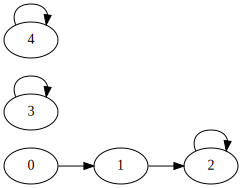

After union(3, 4) roots=[1, 2, 2, 4, 4]
[1, 2, 2, 4, 4]


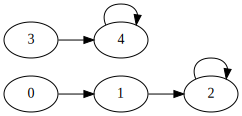

After union(3, 2) roots=[1, 2, 2, 4, 2]
[1, 2, 2, 4, 2]


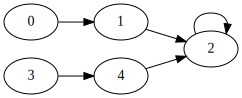

In [50]:
union(roots, 0, 2)
print(f"After union(0, 2) {roots=}")
display(show_graph(roots))

union(roots, 3, 4)
print(f"After union(3, 4) {roots=}")
print(roots)
display(show_graph(roots))

union(roots, 3, 2)
print(f"After union(3, 2) {roots=}")
print(roots)
display(show_graph(roots))

Ezután az a kérdés, hogy el lehet-e jutni `A`-ból, `B`-be könnyen eldönthető. Ha `A` és `B` azonos komponensben van, akkor `A` és `B` között megy út az eredeti gráfban, különben nem.

1. példa
`n = 3`, élek `edges = [[0,1], [1,2], [2,0]]`, `A =  0`, `B = 2`.

In [51]:
def show_edges(edges, direction='LR'):
    g = graphviz.Graph(graph_attr={'rankdir': direction})
    g.edges([(str(a), str(b)) for a, b in edges])
    return g

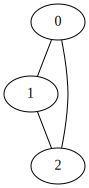

Eredeti gráf


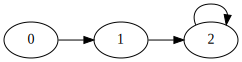

A=0 és B=2 azonos komponensben van


In [52]:
n = 3
edges = [[0,1], [1,2], [2,0]]
A =  0
B = 2

display(show_edges(edges, 'TD'))
print(f"Eredeti gráf")
print("="*50)

roots = [i for i in range(n)]
for a, b in edges:
    union(roots, a, b)

display(show_graph(roots))
print(f"{A=} és {B=} {'azonos' if find(roots, A)==find(roots, B) else 'különböző'} komponensben van")

2. példa

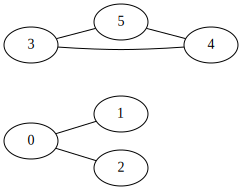

Eredeti gráf


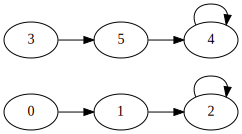

A=0 és B=5 különböző komponensben van


In [53]:
n = 6
edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
A = 0
B = 5

display(show_edges(edges))
print(f"Eredeti gráf")
print("="*50)

roots = [i for i in range(n)]
for a, b in edges:
    union(roots, a, b)

display(show_graph(roots))
print(f"{A=} és {B=} {'azonos' if find(roots, A)==find(roots, B) else 'különböző'} komponensben van")


Látszik, hogy először létre kell hoznunk a `roots` tömböt, majd utána ezzel kell számolnunk.

Célszerű egy osztályt léterhozni:

In [54]:
class UnionFind:
    def __init__(self, n):
        self.roots = [i for i in range(n)]

    def find(self, a):
        while a != self.roots[a]:
            a = self.roots[a]
        return a
        
    def union(self, a, b):
        ra, rb = self.find(a), self.find(b)
        if ra != rb:
            self.roots[ra] = rb
        return self

    def show(self, *args, **kwargs):
        display(show_graph(self.roots, *args, **kwargs))

Mi történik, ha nagyobb gráfunk van?

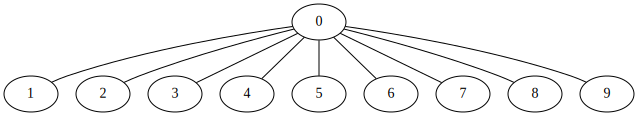

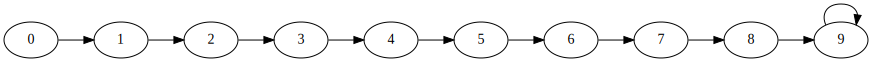

In [55]:
n = 10
edges = [(0,i+1) for i in range(n-1)]
display(show_edges(edges, 'TD'))

uf = UnionFind(n)
for a, b in edges:
    uf.union(a, b)

uf.show()

Valahányszor behúzzuk a $(0, i)$ élet, meg kell keresni $0$ reprezentánsát. $k$ él behúzása után $k$-lépéssel találjuk meg. Ha 10 helyett 10_000 méretű a gráf ez nem fog működni.

### Javítási lehetőségek.

- Amikor megkeressük $i$ reprezentánsát végig megyünk a reprezentánshoz vezető úton. Minden meglátogatott csúcsra ismerté válik a reprezentáns értéke. Ezt beírhatjuk a `roots` tömbe. (path compression)

- A nagyobb komponensbe kössük be a kisebbet és ne fordítva. Ehhez  a ,,méretet'' nyilván kell tartani.

In [56]:
def find_better(roots, a):
    ra = roots[a]
    if a != ra:
        ra = find_better(roots, ra)
        roots[a] = ra
    return ra

def find_better_without_recursion(roots, a):
    stack = []

    ra = roots[a]
    while a != ra:
        stack.append(a)
        a = ra
        ra = roots[a]

    while stack:
        roots[stack.pop()] = ra

    return ra


def union_sizes(roots, sizes, a, b):
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    if ra != rb:
        if sizes[ra] < sizes[rb]:
            ra, rb = rb, ra
        roots[rb] = ra
        sizes[ra] += sizes[rb]

def union_ranks(roots, ranks, a, b):
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    if ra != rb:
        if ranks[ra] < ranks[rb]:
            ra, rb = rb, ra
        roots[rb] = ra
        if ranks[ra] == ranks[rb]:
            ranks[ra] += 1

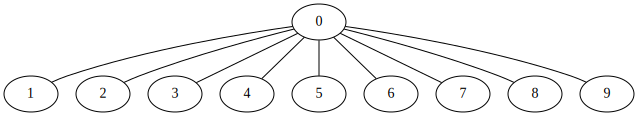

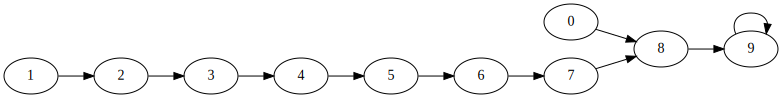

In [57]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]

for a, b in edges:
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    roots[ra] = rb

display(show_graph(roots, 'LR'))


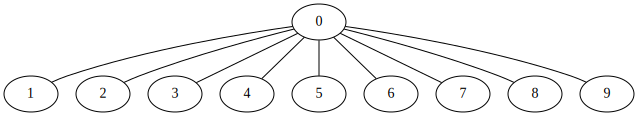

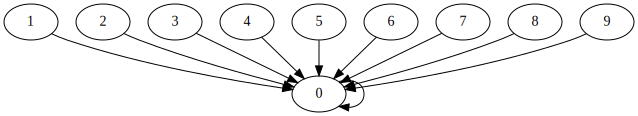

In [58]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]

for a, b in edges:
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    roots[rb] = ra

display(show_graph(roots, 'TD'))


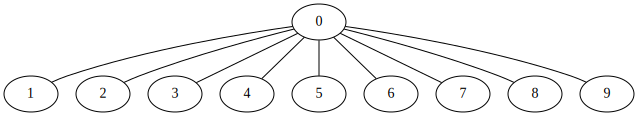

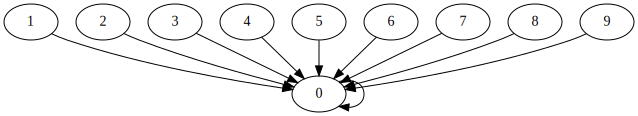

In [59]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]
sizes = [1]*n

for a, b in edges:
    union_sizes(roots, sizes, a, b)

display(show_graph(roots, 'TD'))


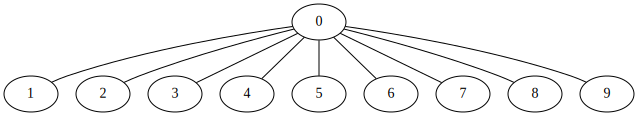

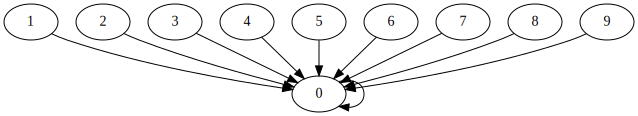

In [60]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]
ranks = [0]*n

for a, b in edges:
    union_ranks(roots, ranks, a, b)

display(show_graph(roots, 'TD'))


### Szokásos implementáció

In [61]:
class UnionFind:
    def __init__(self, n):
        self.roots = [i for i in range(n)]
        self.sizes = [1]*n

    def find(self, a):
        ra = self.roots[a]
        if a != ra:
            ra = self.find( ra)
            self.roots[a] = ra
        return ra

    def union(self, a, b):
        ra = self.find(a)
        rb = self.find(b)
        if ra != rb:
            if self.sizes[ra] < self.sizes[rb]:
                ra, rb = rb, ra
            self.roots[rb] = ra
            self.sizes[ra] += self.sizes[rb]


In [62]:
uf = UnionFind(10)
print(uf)
uf.union(1, 2)
print(uf)
uf.union(5, 9)
uf.union(6, 7)
print(uf)

uf

`__str__` és `__repr__` metódusok

In [63]:
def as_set(seq):
    return f"{{{', '.join(map(str, seq))}}}"

def uf_str(self):
    components = {}
    for a in range(len(self.roots)):
        ra = self.find(a)
        if ra not in components:
            components[ra] = []
        components[ra].append(a)
    return f"{{{ ', '.join(map(as_set, components.values()))}}}"

def uf_repr(self):
    return f"{type(self).__name__}({len(self.roots)})"

# Így is lehet:
UnionFind.__str__ = uf_str
UnionFind.__repr__ = uf_repr

In [64]:
uf = UnionFind(10)
print(uf)
uf.union(1, 2)
print(uf)
uf.union(5, 9)
uf.union(6, 7)
print(uf)

uf

{{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}}
{{0}, {1, 2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}}
{{0}, {1, 2}, {3}, {4}, {5, 9}, {6, 7}, {8}}


UnionFind(10)

### További kérdések

- Tegyük fel, hogy a komponensek száma érdekel minket. Hogyan oldanánk, meg, hogy konstans idő alatt megkaphassuk.
- Tegyük fel, hogy a legnagyobb komponens méretet érdekel minket. Hogyan oldanánk, meg, hogy konstans idő alatt megkaphassuk.
- Hogyan ellenőriznénk, hogy két partíció azonos?

# Faktoriális értékének közelítése

Mekkora $n!$, ha $n$ nagy?

Ötlet:
$$
    \log n! = \sum_{k=1}^n \log k \approx \int_1^{?} \log x dx = \left[ x(\log x-1)\right]_{x=1}^{x=?}
$$

In [65]:
import matplotlib.pyplot as plt
import math

def subdivision(a, b, n):
    d = (b-a)/n
    return [a+i*d for i in range(n+1)]

def add_function_curve(f, a, b, n=100):
    xs = subdivision(a, b, n)
    fxs = [f(x) for x in  xs]
    plt.plot(xs, fxs, "r-")

## Téglalap közelítés

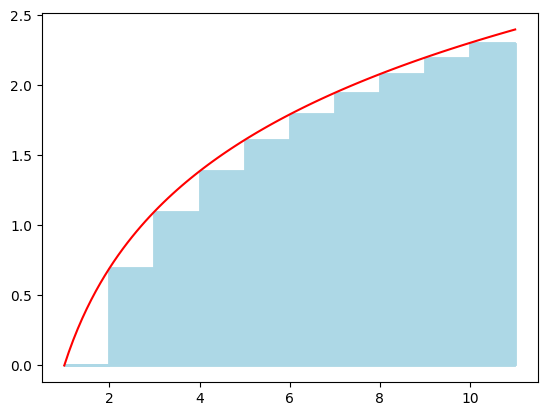

In [66]:
k_values = [k for k in range(1, 11)]
for k in k_values:
    plt.fill_between([k+i for k in k_values for i in range(2)], [math.log(k) for k in k_values for i in range(2)], color='lightblue')

add_function_curve(math.log, 1, 11)


A hiba:

In [67]:
def primitive_function(x):
    return x*(math.log(x)-1)

def rectangle_error(k):
    return primitive_function(k+1)-primitive_function(k)-math.log(k)

def cummulative_error(n, error_fun=rectangle_error):
    return sum(error_fun(k) for k in range(1, n+1))

In [68]:
for n in [10, 100, 1000]:
    print(f"{n=}, {cummulative_error(n)=}")

n=10, cummulative_error(n)=1.2724354277065621
n=100, cummulative_error(n)=2.387796645403718
n=1000, cummulative_error(n)=3.53535560637252


### Javítás, trapéz összeg közelítés

Téglalapok helyett minden egység intervallumon a beírt trapézt  használjuk.

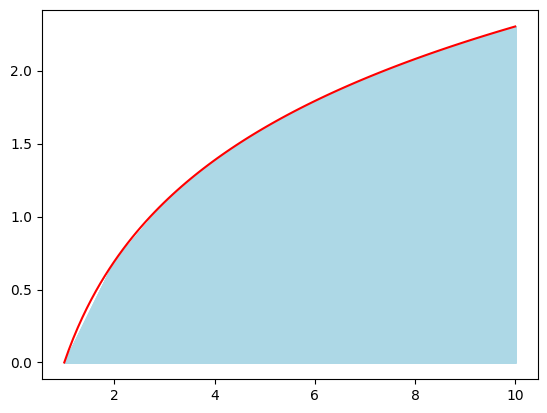

In [69]:
k_values = [k for k in range(1, 11)]
for k in k_values:
    plt.fill_between(k_values, [math.log(k) for k in k_values], color='lightblue')

add_function_curve(math.log, 1, 10)


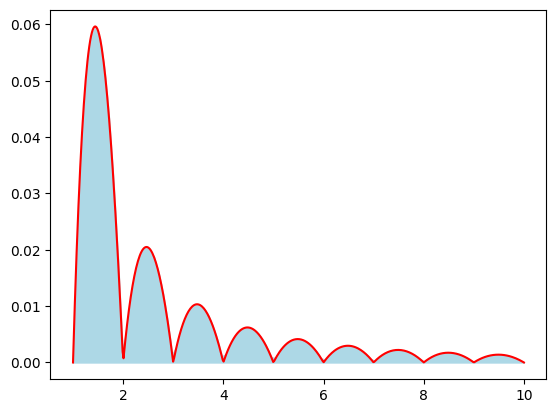

In [70]:
def error_fun(x):
    k, t = divmod(x, 1)
    return math.log(x) - ((1-t)*math.log(k) + t*math.log(k+1))

xs = subdivision(1, 10, 100)
plt.fill_between(xs, [error_fun(x) for x in xs], color='lightblue')
add_function_curve(error_fun, 1, 10, 500)


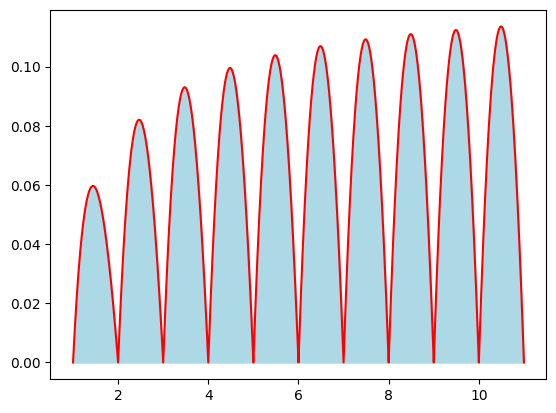

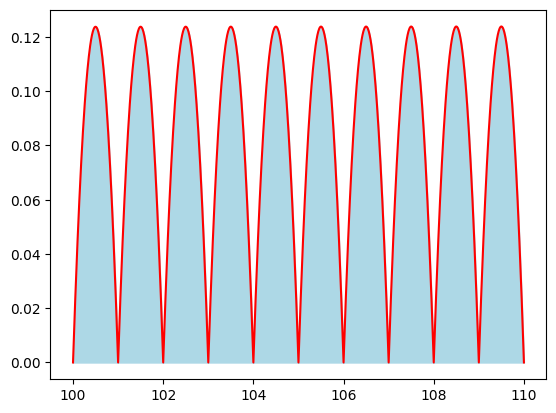

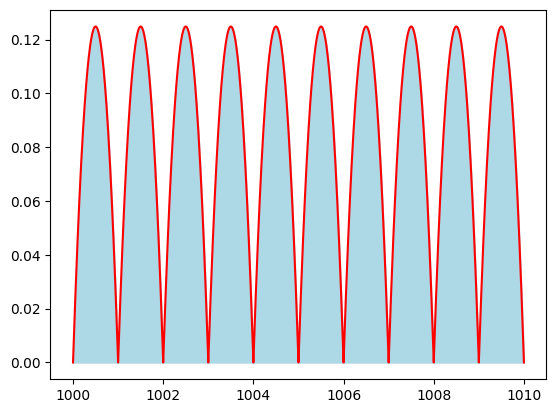

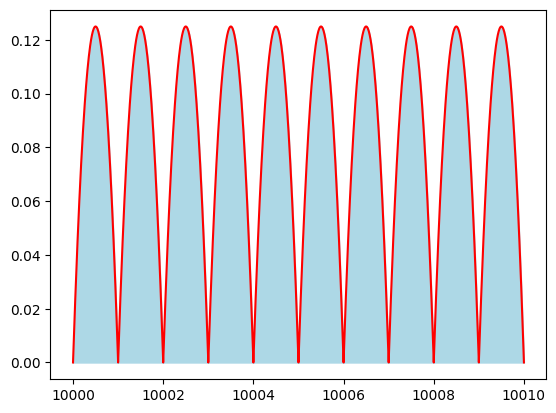

In [75]:
def modified_error_fun(x):
    k = x//1
    return k*k*error_fun(x)

for a in [1, 100, 1000, 10000]:
    b = a+10
    xs = subdivision(a, b, 1000)

    plt.fill_between(xs, [modified_error_fun(x) for x in xs], color='lightblue')
    add_function_curve(modified_error_fun, a, b, 1000)
    plt.show()

In [72]:
def trapezoid_error(k):
    return primitive_function(k+1)-primitive_function(k)-0.5*(math.log(k)+math.log(k+1))


In [73]:
for n in [10, 100, 1000]:
    print(f"{n = :>4}, {cummulative_error(n, trapezoid_error) = :.8f}")

n =   10, cummulative_error(n, trapezoid_error) = 0.07348779
n =  100, cummulative_error(n, trapezoid_error) = 0.08023639
n = 1000, cummulative_error(n, trapezoid_error) = 0.08097822


## Látszik, hogy a hiba lassan nő. Tudunk-e felső becslést adni rá?

$$
    \int_{k}^{k+1} \log x dx = \int_0^1 \log(k+x) dx
$$

A beírt trapéz területe integrállal

$$
    \int_0^1 x\log(k+1)+(1-x)\log(k) dx
$$

Tudjuk-e becsülni a két integrandus különbségét?
$$
    \log(k+x) - (x\log(k+1)+(1-x)\log(k))
$$

Átalakítás mindkét tagból levonunk $\log(k)$-t:
$$
    \log(k+x) - \log(k) - (x\log(k+1)+(1-x)\log(k) -\log(k)) = \log(1+\tfrac{x}{k}) - x\log(1+\tfrac1k)
$$


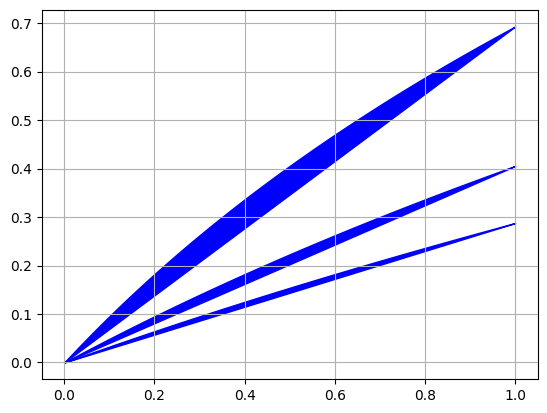

In [74]:
xs = subdivision(0, 1, 100)

for k in range(1, 4):
    plt.fill_between(xs, [math.log(k+x)-math.log(k) for x in xs], [math.log(k+1)*x+math.log(k)*(1-x)-math.log(k) for x in xs], color="blue")

plt.grid()

A logaritmus függvény konkáv, a derivált monoton fogy ($1/x$) és egy beírt húr mindig a végponthoz behúzott érintő egyenesek alatt van.

$$
    \log (1+x)\leq x
$$

ezért
$$
    \log(1+x/k) - x \log(1+1/k)\leq \frac xk - x\log(1+1/k) = x(1/k -\log(1+1/k))
$$

de
$$
    \log(1+1/k) = \log\frac{k+1}{k} = -\log\frac{k}{k+1} = -\log(1-1/(k+1)) \geq \frac1{k+1}
$$

Így

$$
    \log(1+x/k) - x \log(1+1/k)\leq x\left(\frac1k-\frac1{k+1}\right)
$$
és
a $k$. intervallumon elkövetett hiba legfeljebb
$$
    \int_{0}^{1} \log(k+x) - ((1-x)\log(k)+x\log(k+1))dx = \int_0^1 x dx \left(\frac1k -\frac1{k+1}\right)
$$
A hibák összege legfeljebb:
$$
    \frac12 \sum_{k=1}^\infty \frac1k -\frac1{k+1} =\frac12
$$

Összefoglalva:

$$
    \log n! = \int_1^n \log x dx + \frac12 \log n + r_n = n(\log(n) - 1) + 1 + \frac12 \log (n) + r_n
$$
ahol $r_n$ a közelítés hibája az első $n$ intervallumon
$$
    r_n = \sum_{k=1}^n \int_0^1 \log(1+x/k)-x\log(1+1/k)dx \leq 1/2
$$
$(r_n)$ monoton nő, ezért létezik limesze.

Visszaírva faktoriálisra:

$$
    n! = \sqrt{n}\left(\frac{n}{e}\right)^n c_n
$$
ahol $c_n=e^{1+r_n}\leq e^{3/2}$

Analízisben a Wallis formula következményeként szerepel

$$
\lim c_n = \sqrt{2\pi}
$$

Középiskolai tudást használva is kiszámíthatnánk:
$$
    \sqrt{n}\frac1{2^{2n}}\binom{2n}{n}
    = \sqrt{n} \frac1{2^{2n}} \frac{c_{2n} \sqrt{2n} \left(\frac{2n}{e}\right)^{2n}}{c_n^2 n\left(\frac{n}{e}\right)^{2n}}
    \to \lim_{n\to\infty} \frac{c_{2n}}{c_n^2} = \lim_{n\to\infty}\frac{\sqrt{2}}{c_n}
$$

Az
$$
    I_n = \int_{0}^{\pi/2} \cos^n(x) dx
$$
sorozatot vizsgálva,
$$
\frac1{2^{2n}}\binom{2n}{n}\approx \frac{1}{\sqrt{\pi n}}
$$
adódik,  amiből $\lim_n c_n =\sqrt{2\pi}$.

Ez a nevezetes **Stirling** formula:
$$
 \frac{n!}{\sqrt{2\pi n}\left(\frac{n}{e}\right)^n} \to 1
$$
